# TP3 : Density estimation

## Lab session

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [6]:
#standard gaussian to estimate
def reference(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

### Question 1 : Create four functions $K1,K2,K3,K4$ corresponding respectively to uniform, triangle, Epanechnikov and Gaussian kernels.

In [8]:
def K1(x):
    'Uniform'
    return 0.5*(x>=-1 and x<=1)

def K2(x):
    'Triangle'
    return ((1-abs(x))*(x>=-1 and x<=1))
    
def K3(x):
    'Epanechnikov'
    return (0.75*(1-x**2)*(x>=-1 and x<=1))

def K4(x):
    'Gaussian'
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

### Question 2 : Create a function "PlotK(funct,xmin,xmax,pas,col)" with input a function"funct" of one argument, three numbers "xmin, xmax, step" and a letter "col". This function will return the graph of "funct" according to the input parameters. Subsequently, create a function "AllplotK(xmin,xmax,pas,col1,col2,col3,col4)" plotting the four kernels on a same graph with a legend and colors specified in input. Test for a few input values.

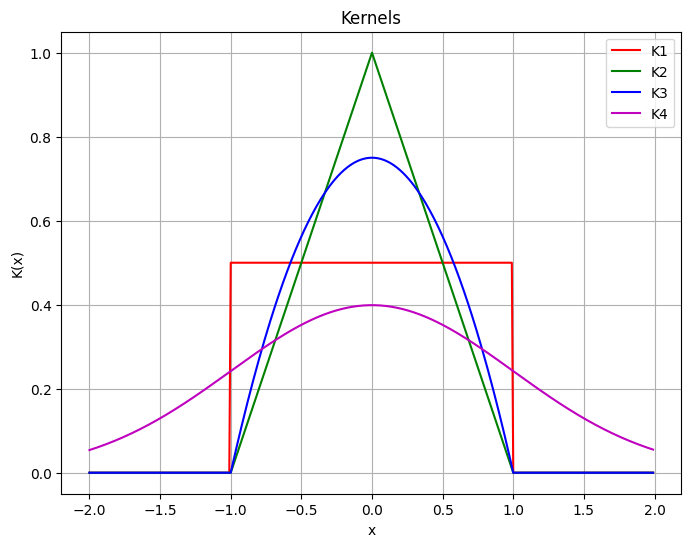

In [13]:
def PlotK(funct,xmin,xmax,pas,col):
    x = np.arange(xmin, xmax, pas)
    y = np.array([funct(xi) for xi in x])
    plt.plot(x, y, color=col, label=funct.__name__)

            
def AllplotK(xmin,xmax,pas,col1,col2,col3,col4):
    plt.figure(figsize=(8, 6))
    
    PlotK(K1, xmin, xmax, pas, col1)
    PlotK(K2, xmin, xmax, pas, col2)
    PlotK(K3, xmin, xmax, pas, col3)
    PlotK(K4, xmin, xmax, pas, col4)
    
    plt.legend()
    plt.title("Kernels")
    plt.xlabel("x")
    plt.ylabel("K(x)")
    plt.grid()
    plt.show()

# Exemple d'utilisation
AllplotK(-2, 2, 0.01, "r", "g", "b", "m")
        

### Question 3 : Generate a realization of size $n$ of $X$ according to a standard Gaussian law. ($n$ is currently set at $100$ in the script).

In [17]:
n=100
X=np.random.randn(n)
print(X)

[-5.91029399e-01  1.66954346e+00  5.36351413e-01 -8.11239365e-01
 -7.93297059e-01 -4.04061695e-01  1.03118248e+00  2.29478628e-01
 -8.16194950e-01  1.14919527e+00  5.22873656e-01  5.52029952e-01
  1.98010450e+00 -3.82700410e-02  2.18058653e-02  6.41023133e-01
 -6.49760962e-02 -9.95864659e-01 -7.39274132e-02 -1.01655005e-01
 -5.66224535e-01 -5.29252426e-01 -1.83697806e+00  1.17935809e+00
 -9.03941667e-01  8.55184881e-01 -1.51913804e+00 -6.18051013e-01
  7.90710767e-04  8.83393104e-01  8.65606379e-01  1.25804761e-01
 -2.24712074e-01  9.05953113e-02  3.81555255e-01 -5.38362274e-02
 -5.91855084e-03 -1.03392934e+00  3.10855601e-01  1.68581930e+00
  1.63644270e+00 -1.03838200e+00 -2.90740974e-01  1.24291444e+00
 -1.21756372e+00  8.99366185e-01  7.34613764e-02 -1.07623370e+00
 -5.96978103e-01 -7.83056363e-02  8.24038790e-01  3.32014946e-03
  6.04881904e-01 -9.10488265e-01 -1.17881152e-01  9.50242685e-01
  9.45114591e-01  9.33438507e-01  1.06972345e+00 -2.95666363e-02
 -8.92797759e-01 -2.11490

### Question 4 : Define "fchapeau(funct,h,x)"with argument "funct", window "h" and real "x" and returns the image of "x" by $\widehat{f}_h$. 

In [24]:
def fchapeau(funct,h,x,X): 
        somme=0
        for i in range(n):
                somme+=1/h*funct((x-X[i])/h)
        return somme*1/n
    

### Question 5 : Represent on the same chart the reference function as well as the four $\widehat{f}_h$ functions obtained with the $K1,K2,K3,K4$ kernels. For this question, set $h=2$.

In [28]:
def Plotfchap(funct,h,xmin,xmax,pas,col): 
    x_vals = np.arange(xmin, xmax, pas)
    y_vals = [fchapeau(funct, h, x, X) for x in x_vals]
    plt.plot(x_vals, y_vals, color=col, label=f"{funct.__name__}, h={h}")
    
def Allplotfchapeau(h1,h2,h3,h4,xmin,xmax,pas,col1,col2,col3,col4,colref):
        

_IncompleteInputError: incomplete input (4090396923.py, line 7)

### Question 6 : Same for $h=1$. Comment.

### Question 7 : Redo questions 5 and 6 with
### \begin{align*} (n,h)\in \{(10,2),(10,1),(1000,2),(1000,1)\}.\end{align*} Comment.

### Question 8 : Define "SCE(funct,h,f)" with input "funct", a function "f", a window "h" and returns the sum of squared differences between "funct" and "f" ("f" is the reference and "funct" is the estimation).

In [ ]:
def SCE(funct,h,f):
        

### Question 9 : Create a function "thebesth" that takes a function (the kernel in question) and another function $f$ (the reference) into parameters and returns the index divided by $100$ of the minimum list $\{SCE(k/100)\}_{1\le k\le 200}$.

In [ ]:
def thebesth(funct,f):
        

### Question 10 : Create a function that graphically represents the four density estimates for these four kernels with the windows obtained via the "thebesth" function, and plot the reference density. We keep $n=1000$ for this question.

### Question 11 : Execute this function with $mu1=0$, $mu2=5$ and $sigma1=sigma2=1$, $N=100$ and $h=0.75$. Choose the "gaussian" kernel.

In [ ]:

def estimatedensity(N,h,mu1,sigma1,mu2,sigma2,kernel):
        # generate samples
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # set the x interval
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # mixture
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # density estimation for X
        kde = KernelDensity(kernel=kernel, bandwidth=h).fit(X)   


        # density computation for X_plot
        density = np.exp(kde.score_samples(X_plot))

        # plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='True density')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        ax.legend(loc='upper left')
        plt.show()            

### Question 12 : Vary $h$.

### Question 13 : Vary $N$.

### Question 14 : Replace 'gaussian' by 'epanechnikov'. Comment